In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [29]:
labels = ['Aneri', 'Mona','Manoj','Not_signature','Sudipta','Yukta','Unrecognized_sign']
img_size = 256
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [30]:
train = get_data('/content/drive/MyDrive/MLDA_Signature_Project/data/train')
val = get_data('/content/drive/MyDrive/MLDA_Signature_Project/data/test')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


In [36]:
print(train.shape)
print(val.shape)

(164, 2)
(22, 2)


In [37]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [39]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [47]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(7, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 64)       

In [48]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [49]:
history = model.fit(x_train,y_train,epochs = 500 , validation_data = (x_val, y_val))
 

Epoch 1/500
6/6 [==============================] - 14s 2s/step - loss: 1.9920 - accuracy: 0.0902 - val_loss: 1.9612 - val_accuracy: 0.0909
Epoch 2/500
6/6 [==============================] - 13s 2s/step - loss: 1.9909 - accuracy: 0.0995 - val_loss: 1.9551 - val_accuracy: 0.1364
Epoch 3/500
6/6 [==============================] - 13s 2s/step - loss: 1.9619 - accuracy: 0.1442 - val_loss: 1.9505 - val_accuracy: 0.1364
Epoch 4/500
6/6 [==============================] - 13s 2s/step - loss: 1.9713 - accuracy: 0.1555 - val_loss: 1.9460 - val_accuracy: 0.1818
Epoch 5/500
6/6 [==============================] - 13s 2s/step - loss: 1.9439 - accuracy: 0.1385 - val_loss: 1.9430 - val_accuracy: 0.1818
Epoch 6/500
6/6 [==============================] - 13s 2s/step - loss: 1.9408 - accuracy: 0.1552 - val_loss: 1.9405 - val_accuracy: 0.1818
Epoch 7/500
6/6 [==============================] - 13s 2s/step - loss: 1.9493 - accuracy: 0.1711 - val_loss: 1.9386 - val_accuracy: 0.1818
Epoch 8/500
6/6 [==========

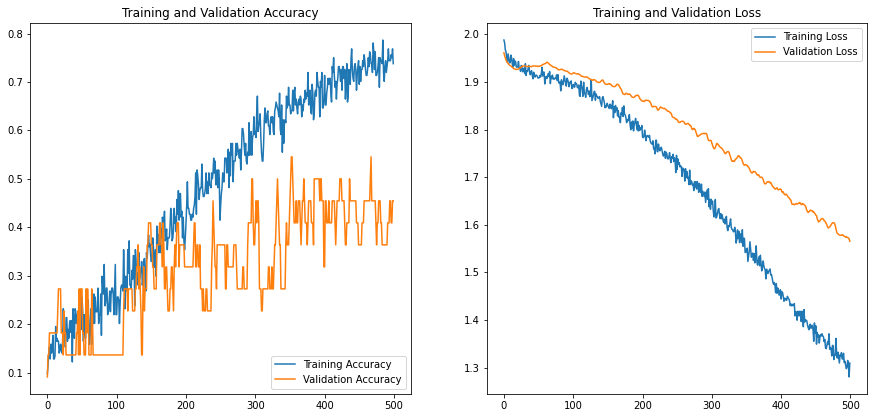

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [59]:
model.save('my_model_1.h5',save_format='h5')

In [56]:
#'Mona','Manoj','Not_signature','Sudipta','Yukta','Unrecognized_sign'
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['Aneri (Class 0)','Mona (Class 1)','Manoj (Class 2)','Not_Signature (Class 3)', 'Sudipta (Class 4)','Yukta (Class 5)','Unrecognized_sign (Class 6)']))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


                             precision    recall  f1-score   support

            Aneri (Class 0)       0.33      0.67      0.44         3
             Mona (Class 1)       0.40      0.50      0.44         4
            Manoj (Class 2)       0.00      0.00      0.00         3
    Not_Signature (Class 3)       0.75      0.75      0.75         4
          Sudipta (Class 4)       0.00      0.00      0.00         2
            Yukta (Class 5)       0.60      1.00      0.75         3
Unrecognized_sign (Class 6)       0.00      0.00      0.00         3

                   accuracy                           0.45        22
                  macro avg       0.30      0.42      0.34        22
               weighted avg       0.34      0.45      0.38        22



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
img_arr = cv2.imread('Aneri17.jpeg')[...,::-1] 
resized_arr = cv2.resize(img_arr, (img_size, img_size))
pree = np.empty([1,256,256,3], dtype = int)
pree[0]=resized_arr
pree.shape
model.predict_classes(pree)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0])